In [50]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["C214", "C215", "C220", "C221", "C223"]
mode = "yesterday"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)
date_min = "2023-08-15"

In [52]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-09-08 20:44:10,444][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 21 sessions for C214 between 2023-08-15 and 2023-09-07
fetched 22 sessions for C215 between 2023-08-15 and 2023-09-07
fetched 24 sessions for C220 between 2023-08-15 and 2023-09-08
fetched 24 sessions for C221 between 2023-08-15 and 2023-09-08
fetched 23 sessions for C223 between 2023-08-15 and 2023-09-07


In [53]:
c222 = create_trials_df_from_dj(animal_ids=["C222"], date_min="2023-08-18")

trials_df = pd.concat([trials_df, c222], axis=0)

fetched 20 sessions for C222 between 2023-08-18 and 2023-09-07


In [54]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making C222_2023-09-07_day_summary
making C223_2023-09-07_day_summary
making C220_2023-09-08_day_summary
making C221_2023-09-08_day_summary
['s_a', 'delay']


In [55]:
print(f"In {mode} mode!")
print(
    trials_df.query("date == @date")
    .groupby(["animal_id", "date"])
    .give_type_imp.unique()
)

In yesterday mode!
animal_id  date      
C214       2023-09-07    [water_and_light]
C215       2023-09-07    [water_and_light]
C220       2023-09-07              [light]
C221       2023-09-07    [water_and_light]
C222       2023-09-07              [light]
C223       2023-09-07              [light]
Name: give_type_imp, dtype: object


In [56]:
trials_df.query("date == @date").groupby("animal_id").stimulus_dur.describe()

count   mean           std    min    25%    50%    75%    max
animal_id                                                               
C214       184.0  0.001  2.174321e-19  0.001  0.001  0.001  0.001  0.001
C215       130.0  0.001  0.000000e+00  0.001  0.001  0.001  0.001  0.001
C220       183.0  0.001  2.174353e-19  0.001  0.001  0.001  0.001  0.001
C221        93.0  0.400  1.674361e-16  0.400  0.400  0.400  0.400  0.400
C222       222.0  0.001  4.346609e-19  0.001  0.001  0.001  0.001  0.001
C223        55.0  0.001  2.188390e-19  0.001  0.001  0.001  0.001  0.001

In [57]:
trials_df.query("date == @date").groupby("animal_id").volume_multiplier.mean()

animal_id
C214    1.0
C215    1.0
C220    1.0
C221    0.5
C222    1.0
C223    1.0
Name: volume_multiplier, dtype: float64

In [58]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [59]:
ANIMAL_IDS + ["C222"]

['C214', 'C215', 'C220', 'C221', 'C223', 'C222']

In [60]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS + ["C222"], date_min=date_min, date_max=date_max
# )
f_name = "C2s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS + ["C222"],
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-08-15 -> 2023-09-07
Returning appended df with entries between 2023-08-15 and 2023-09-07
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/C2s_days_df.csv


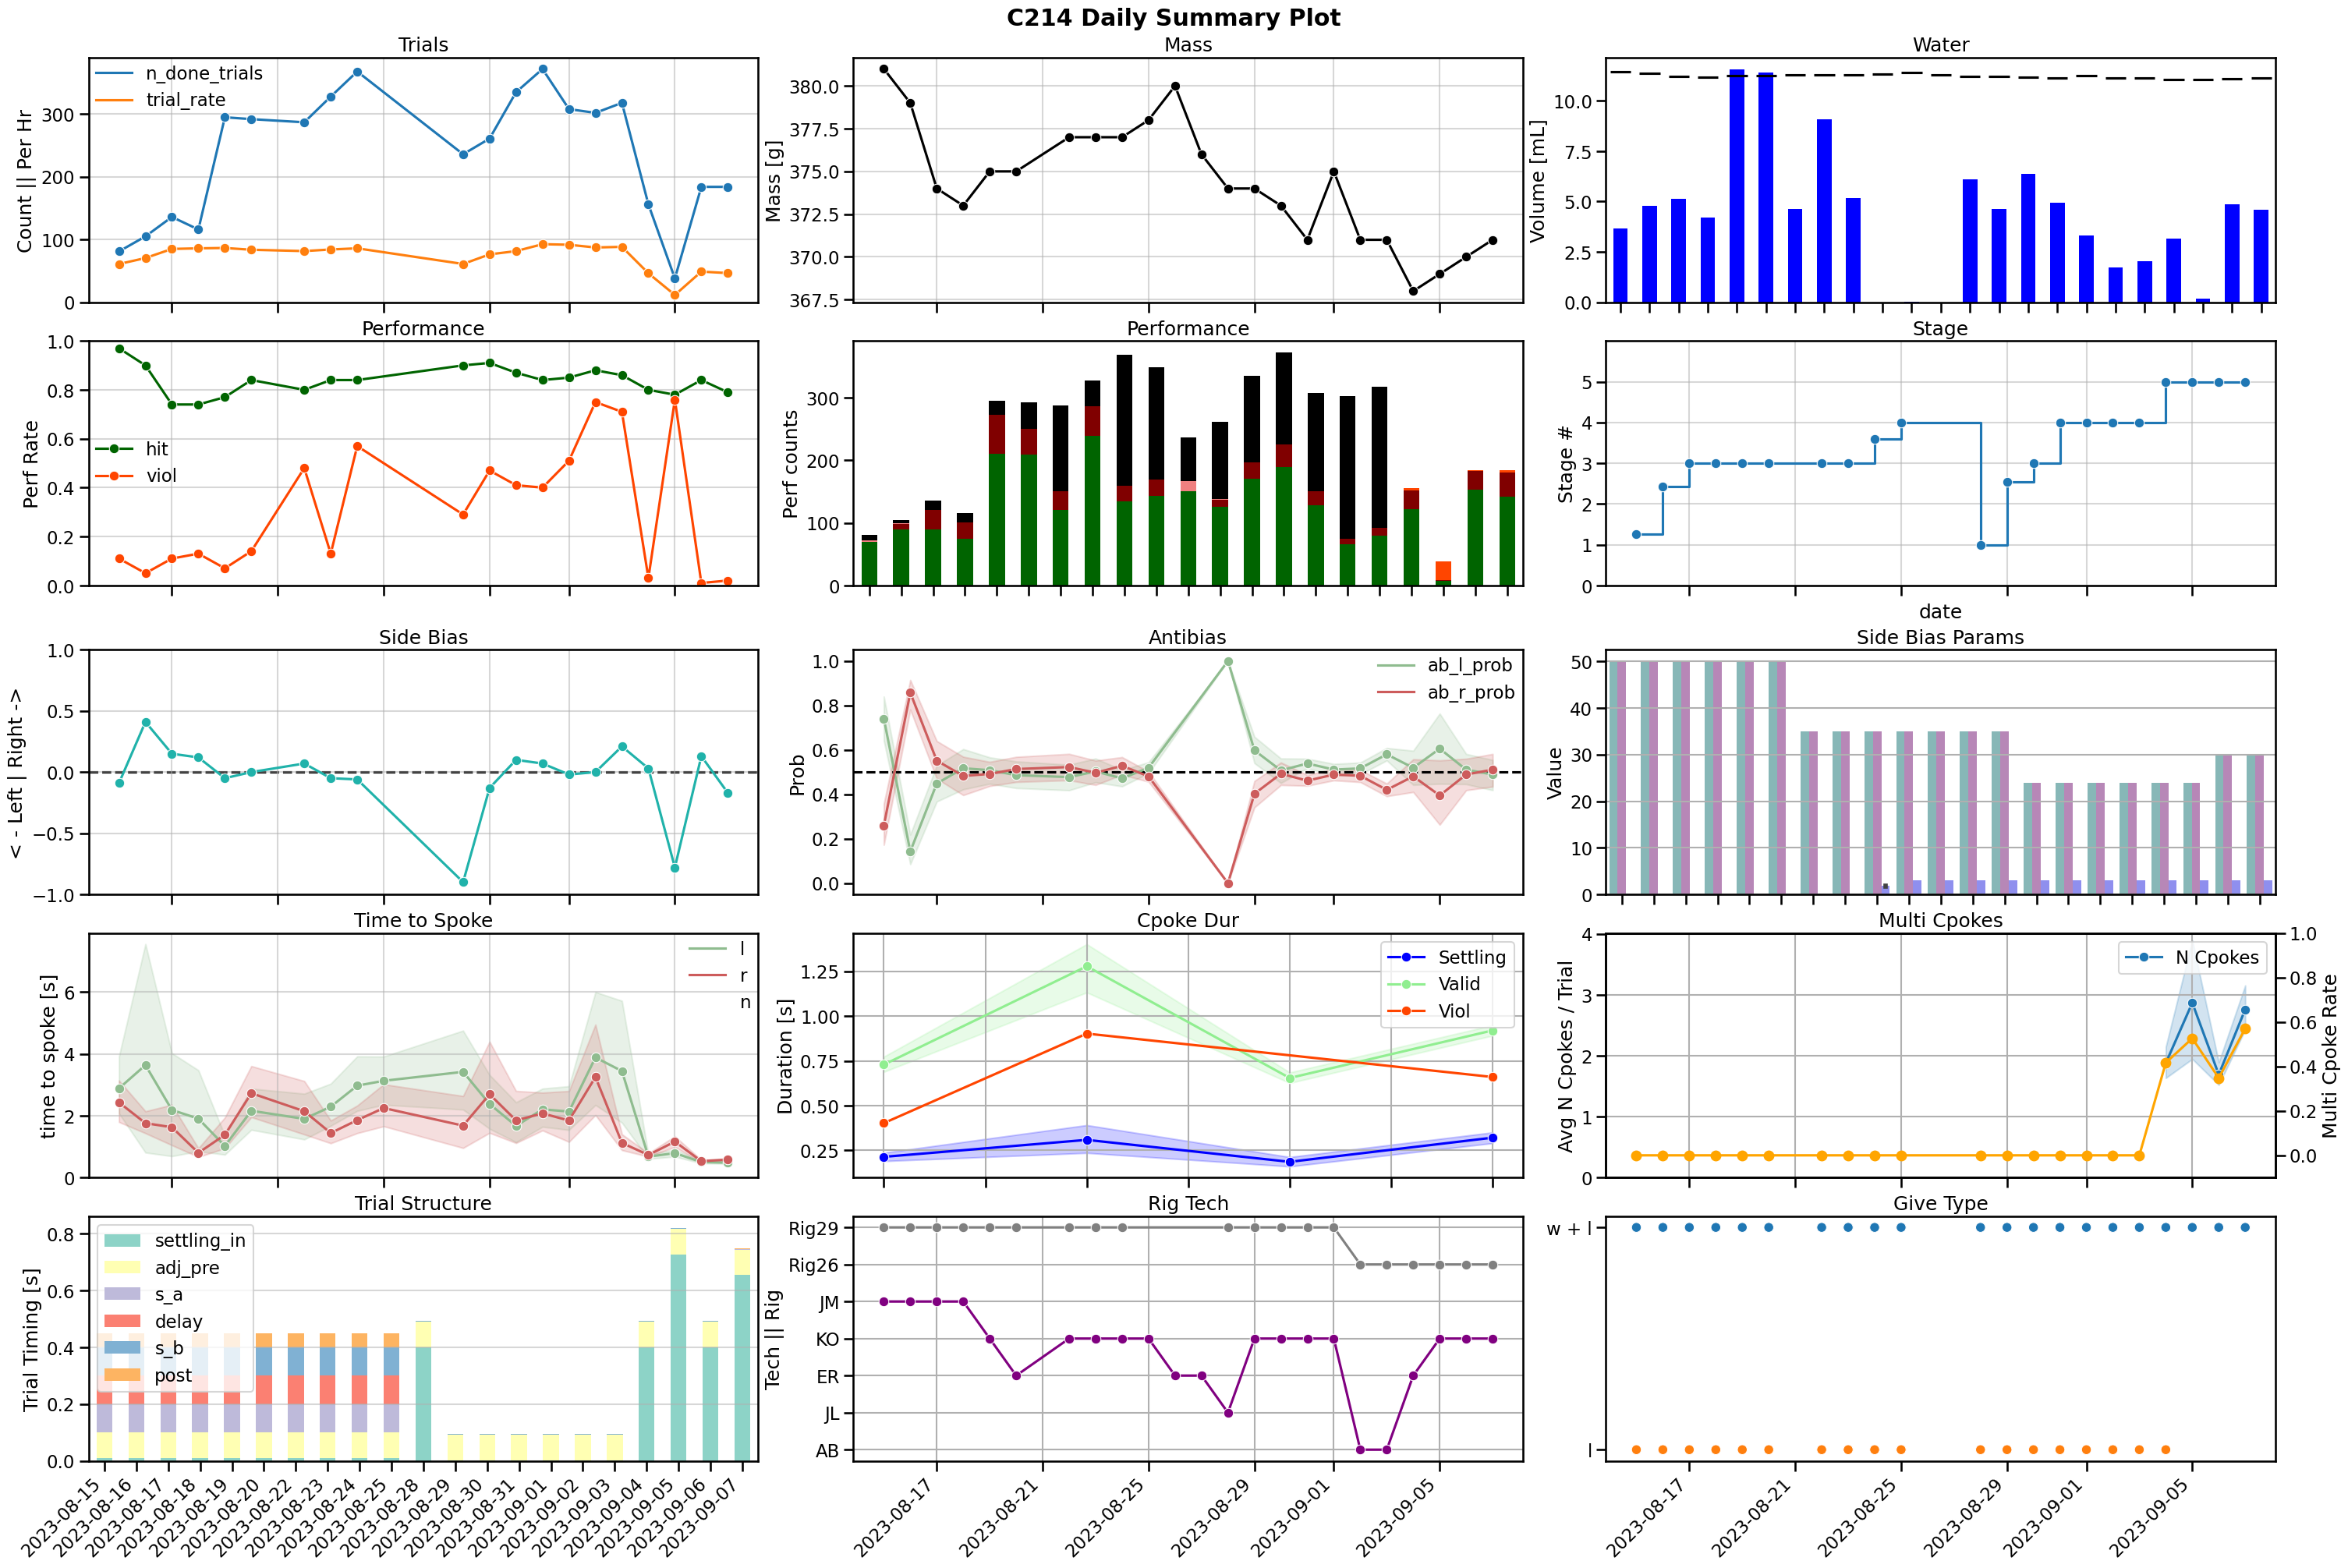

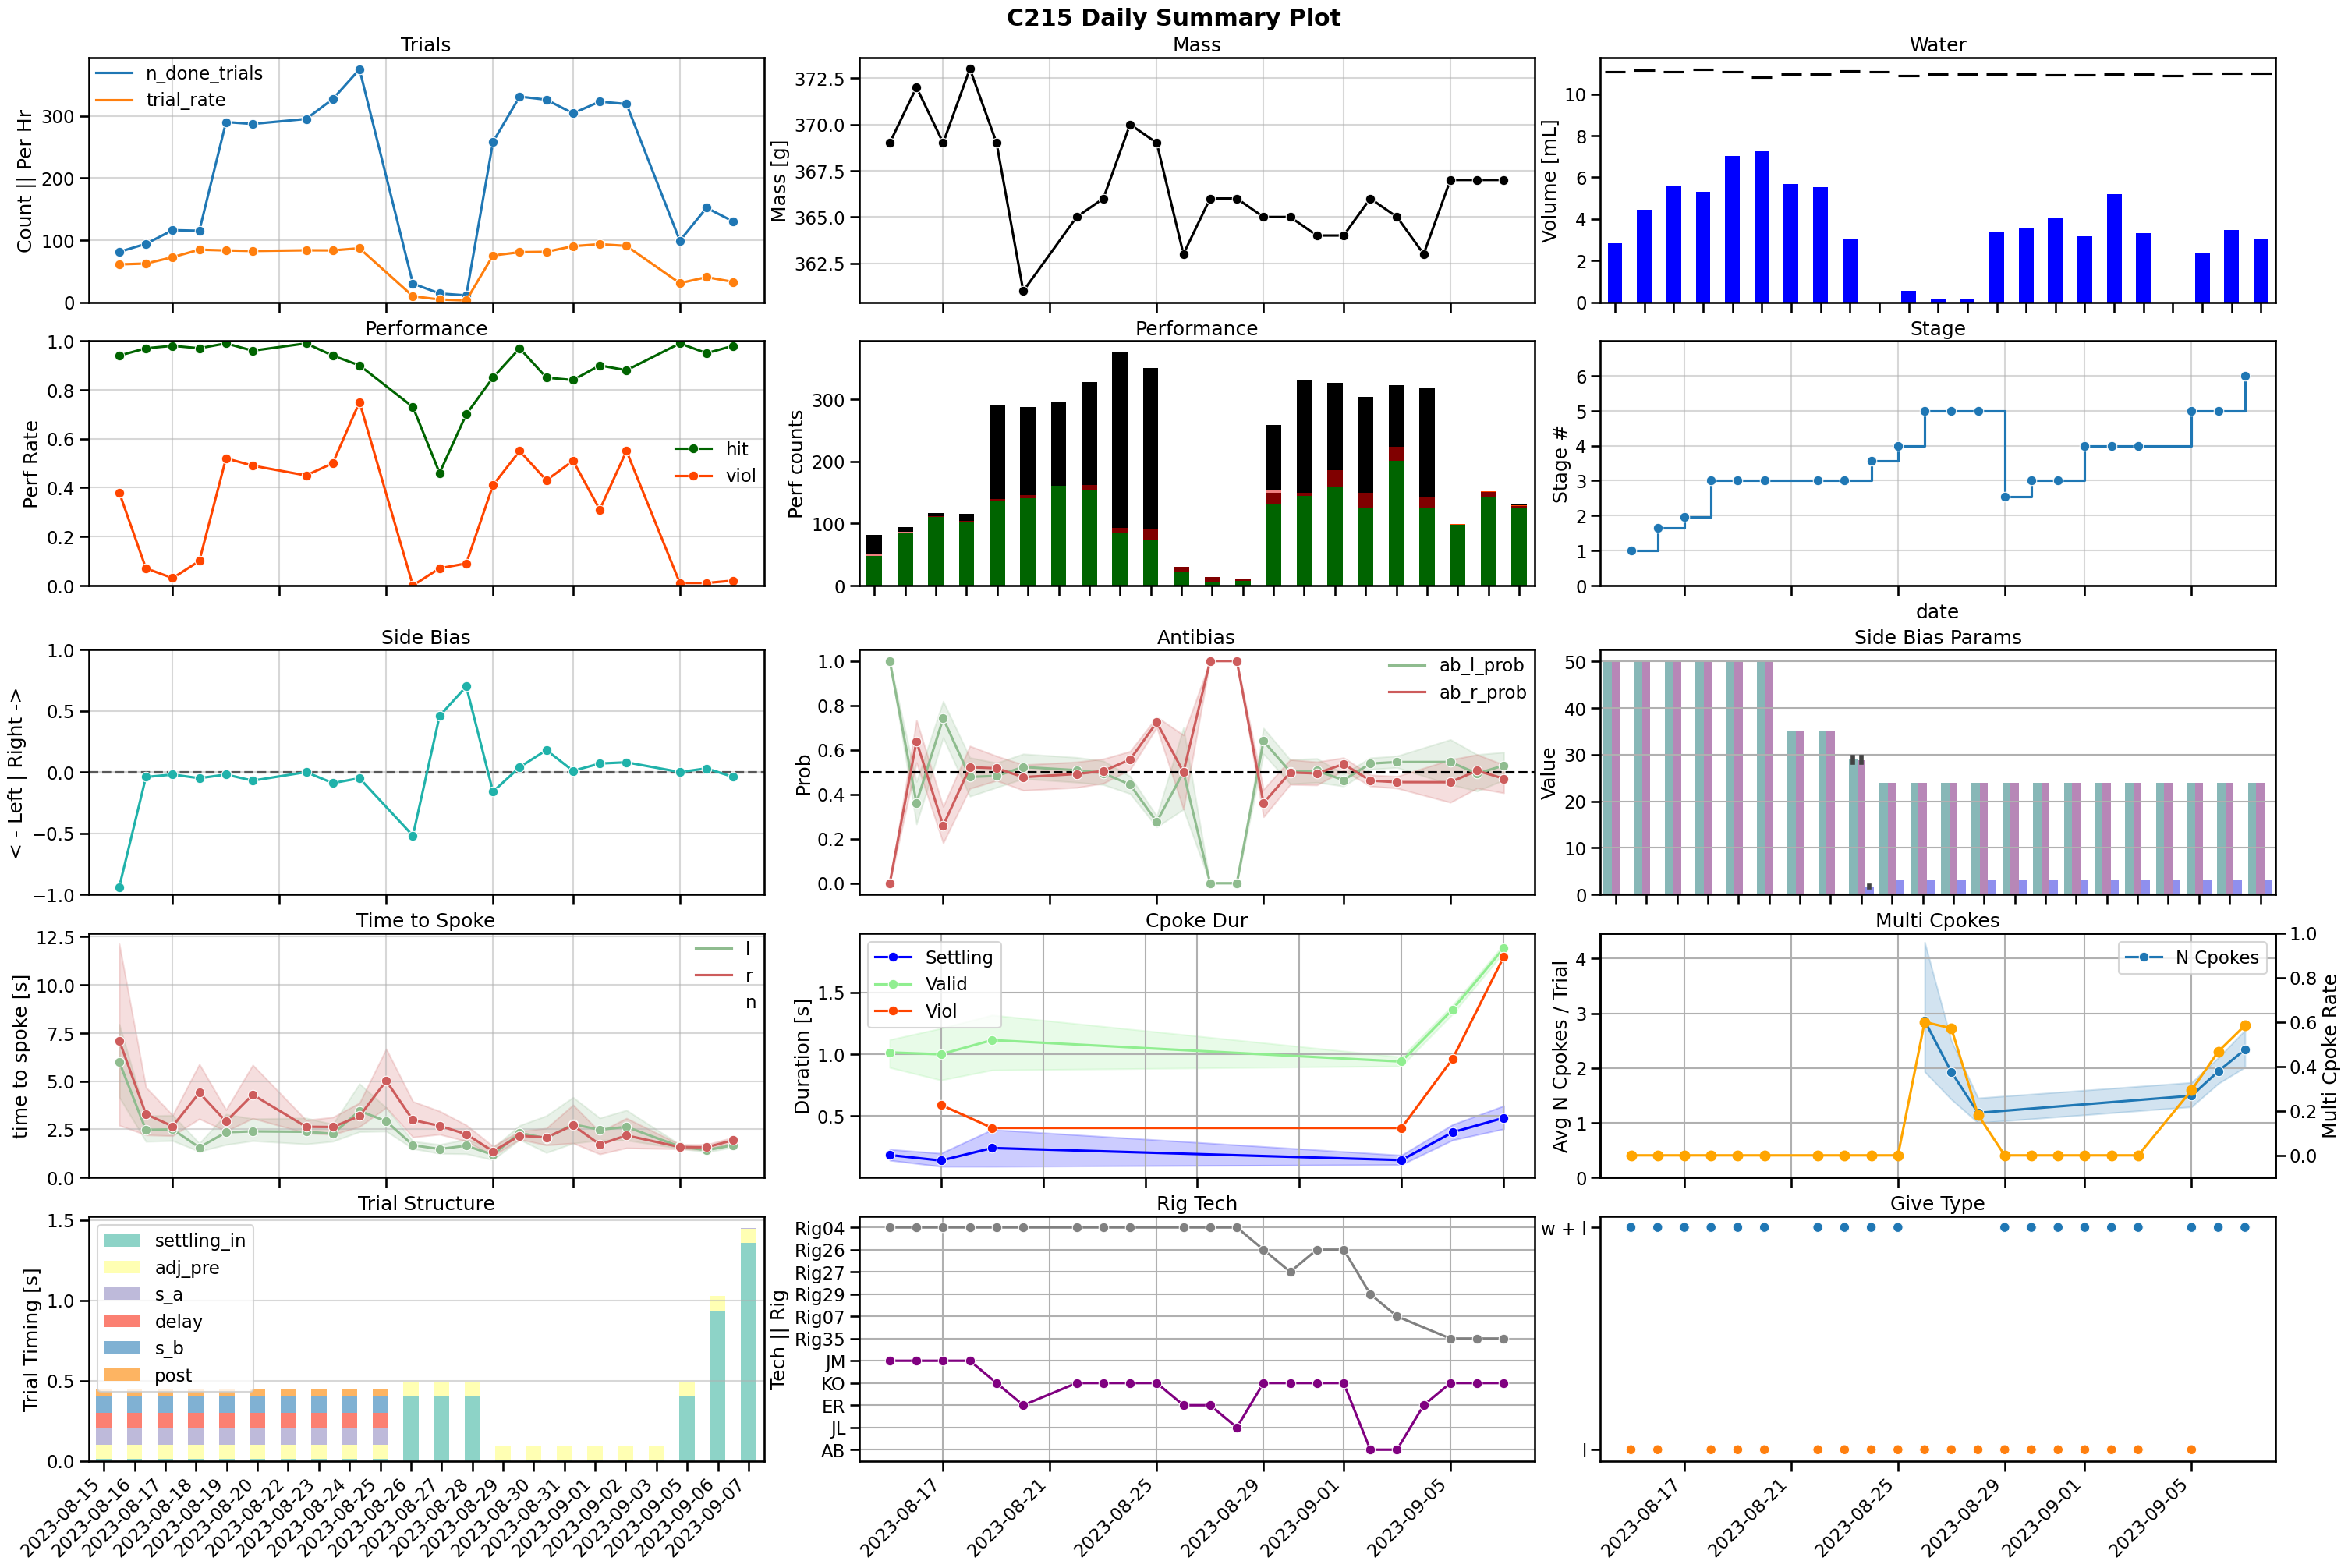

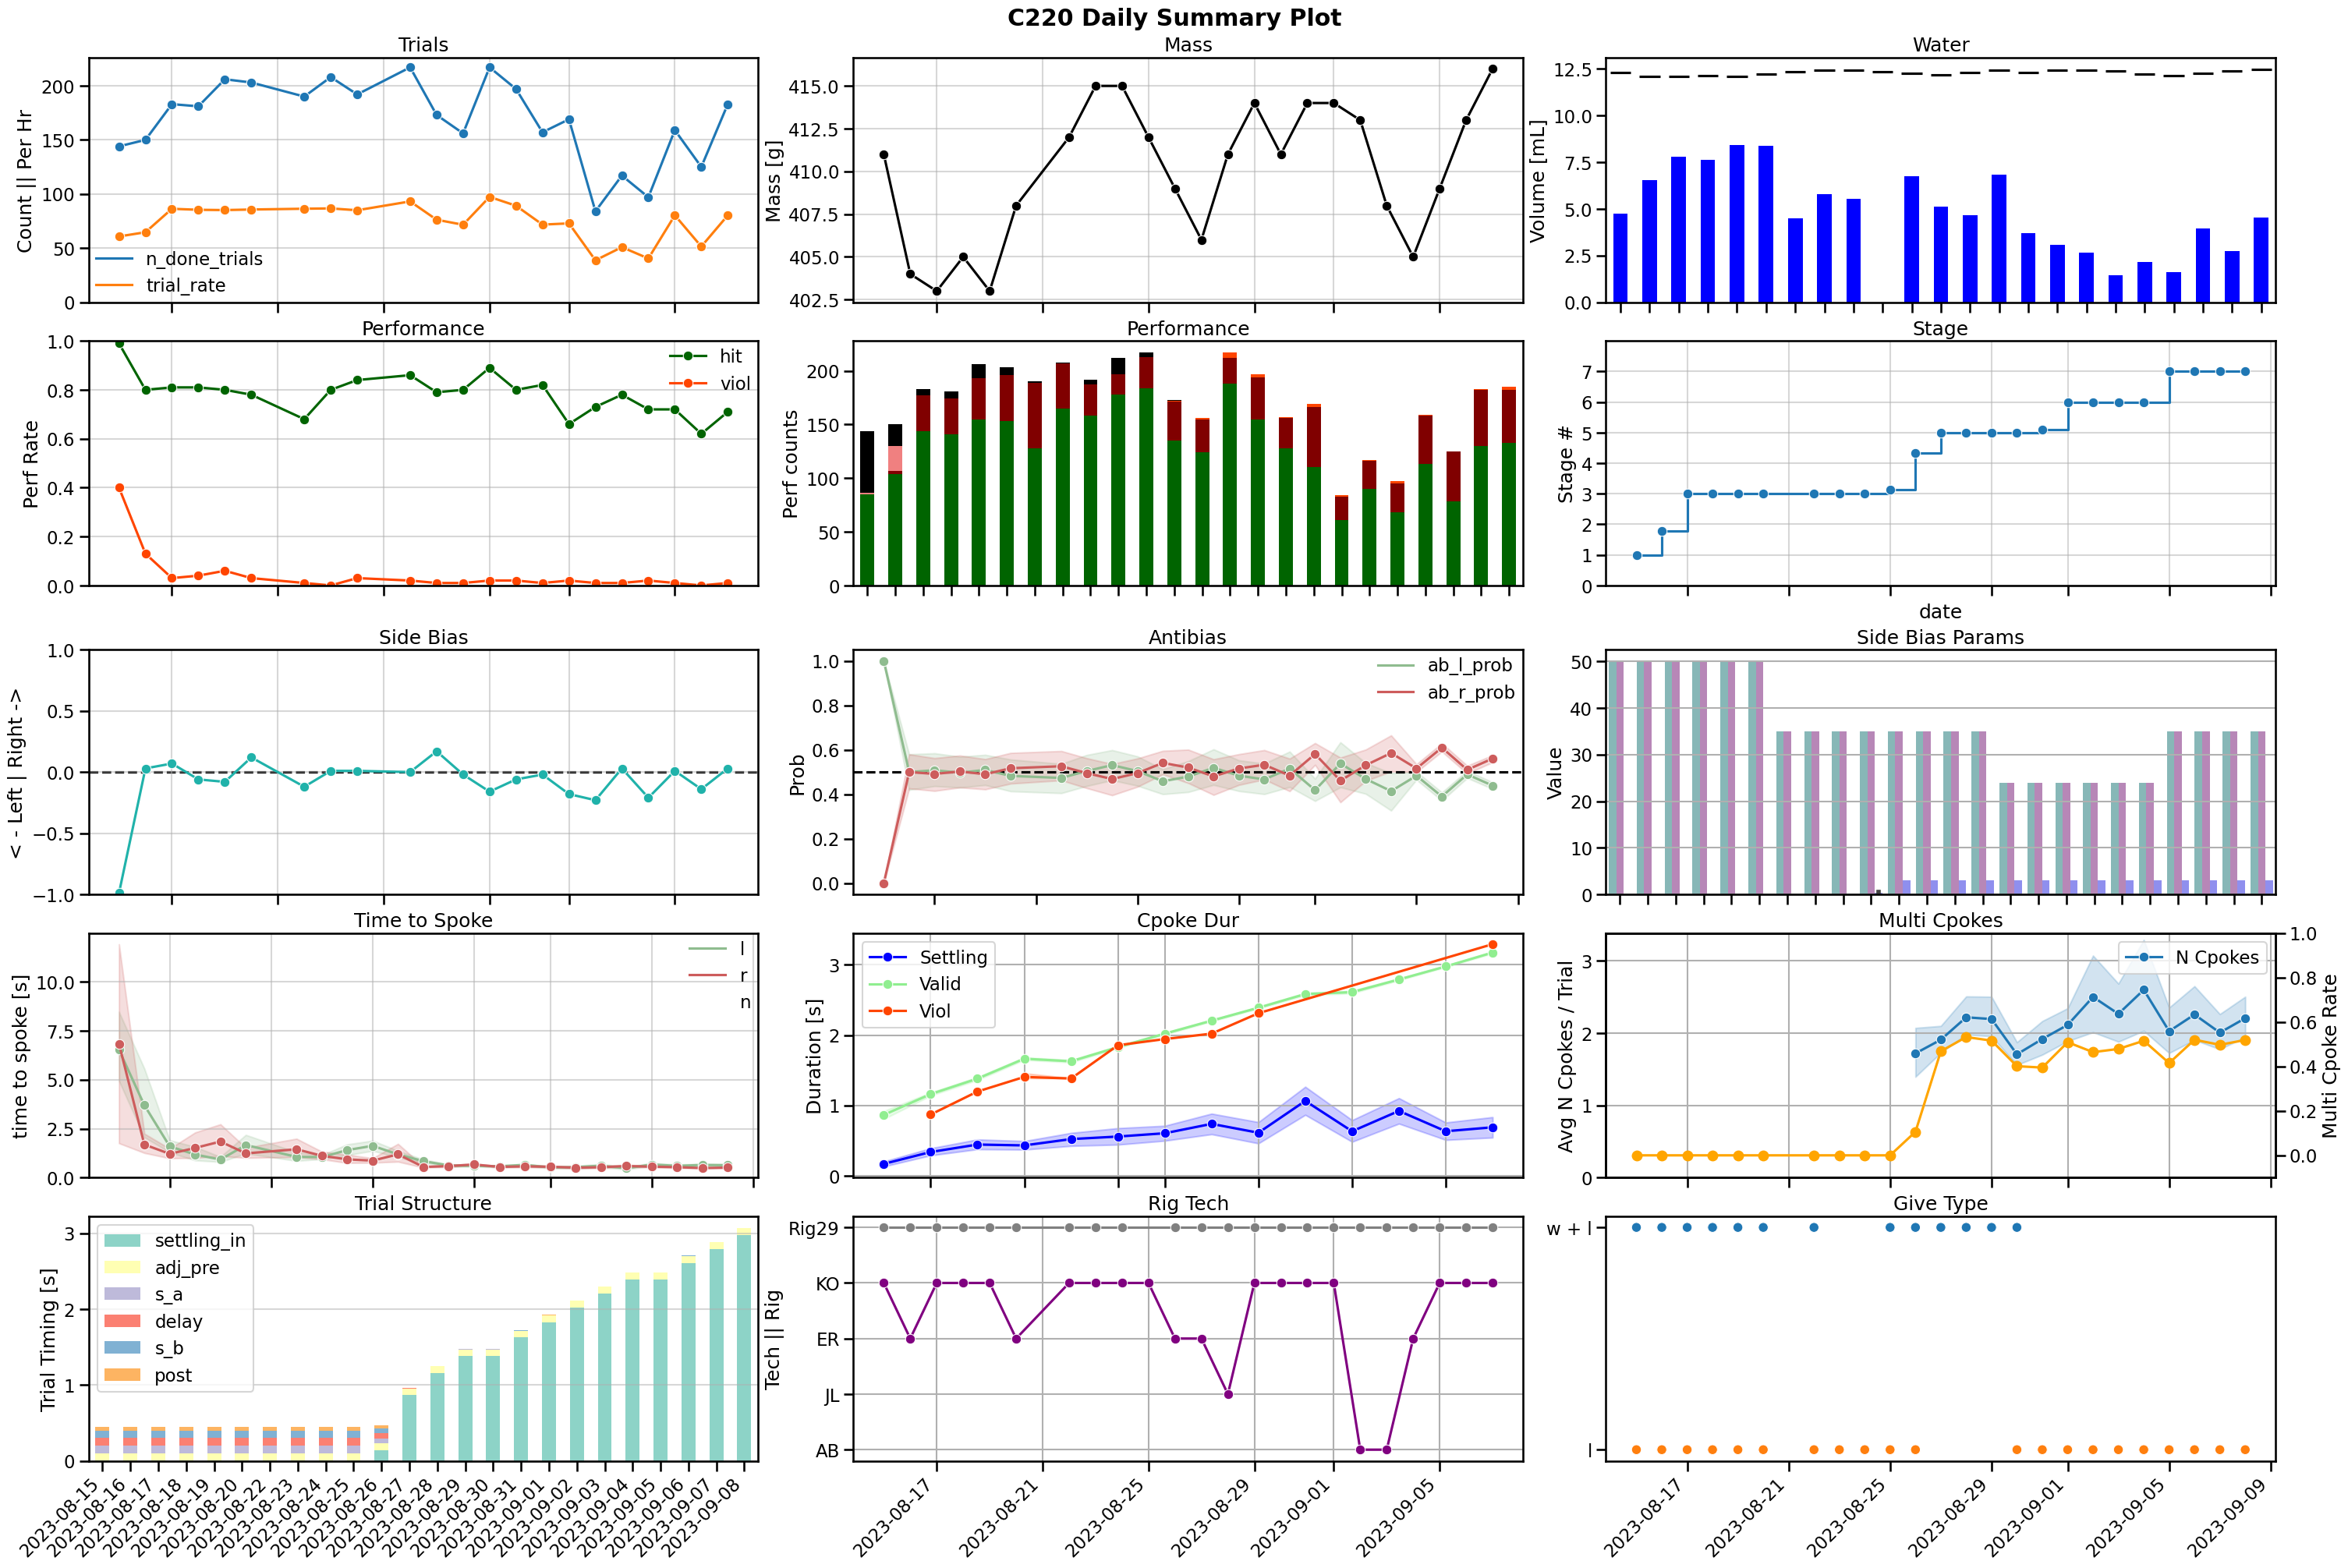

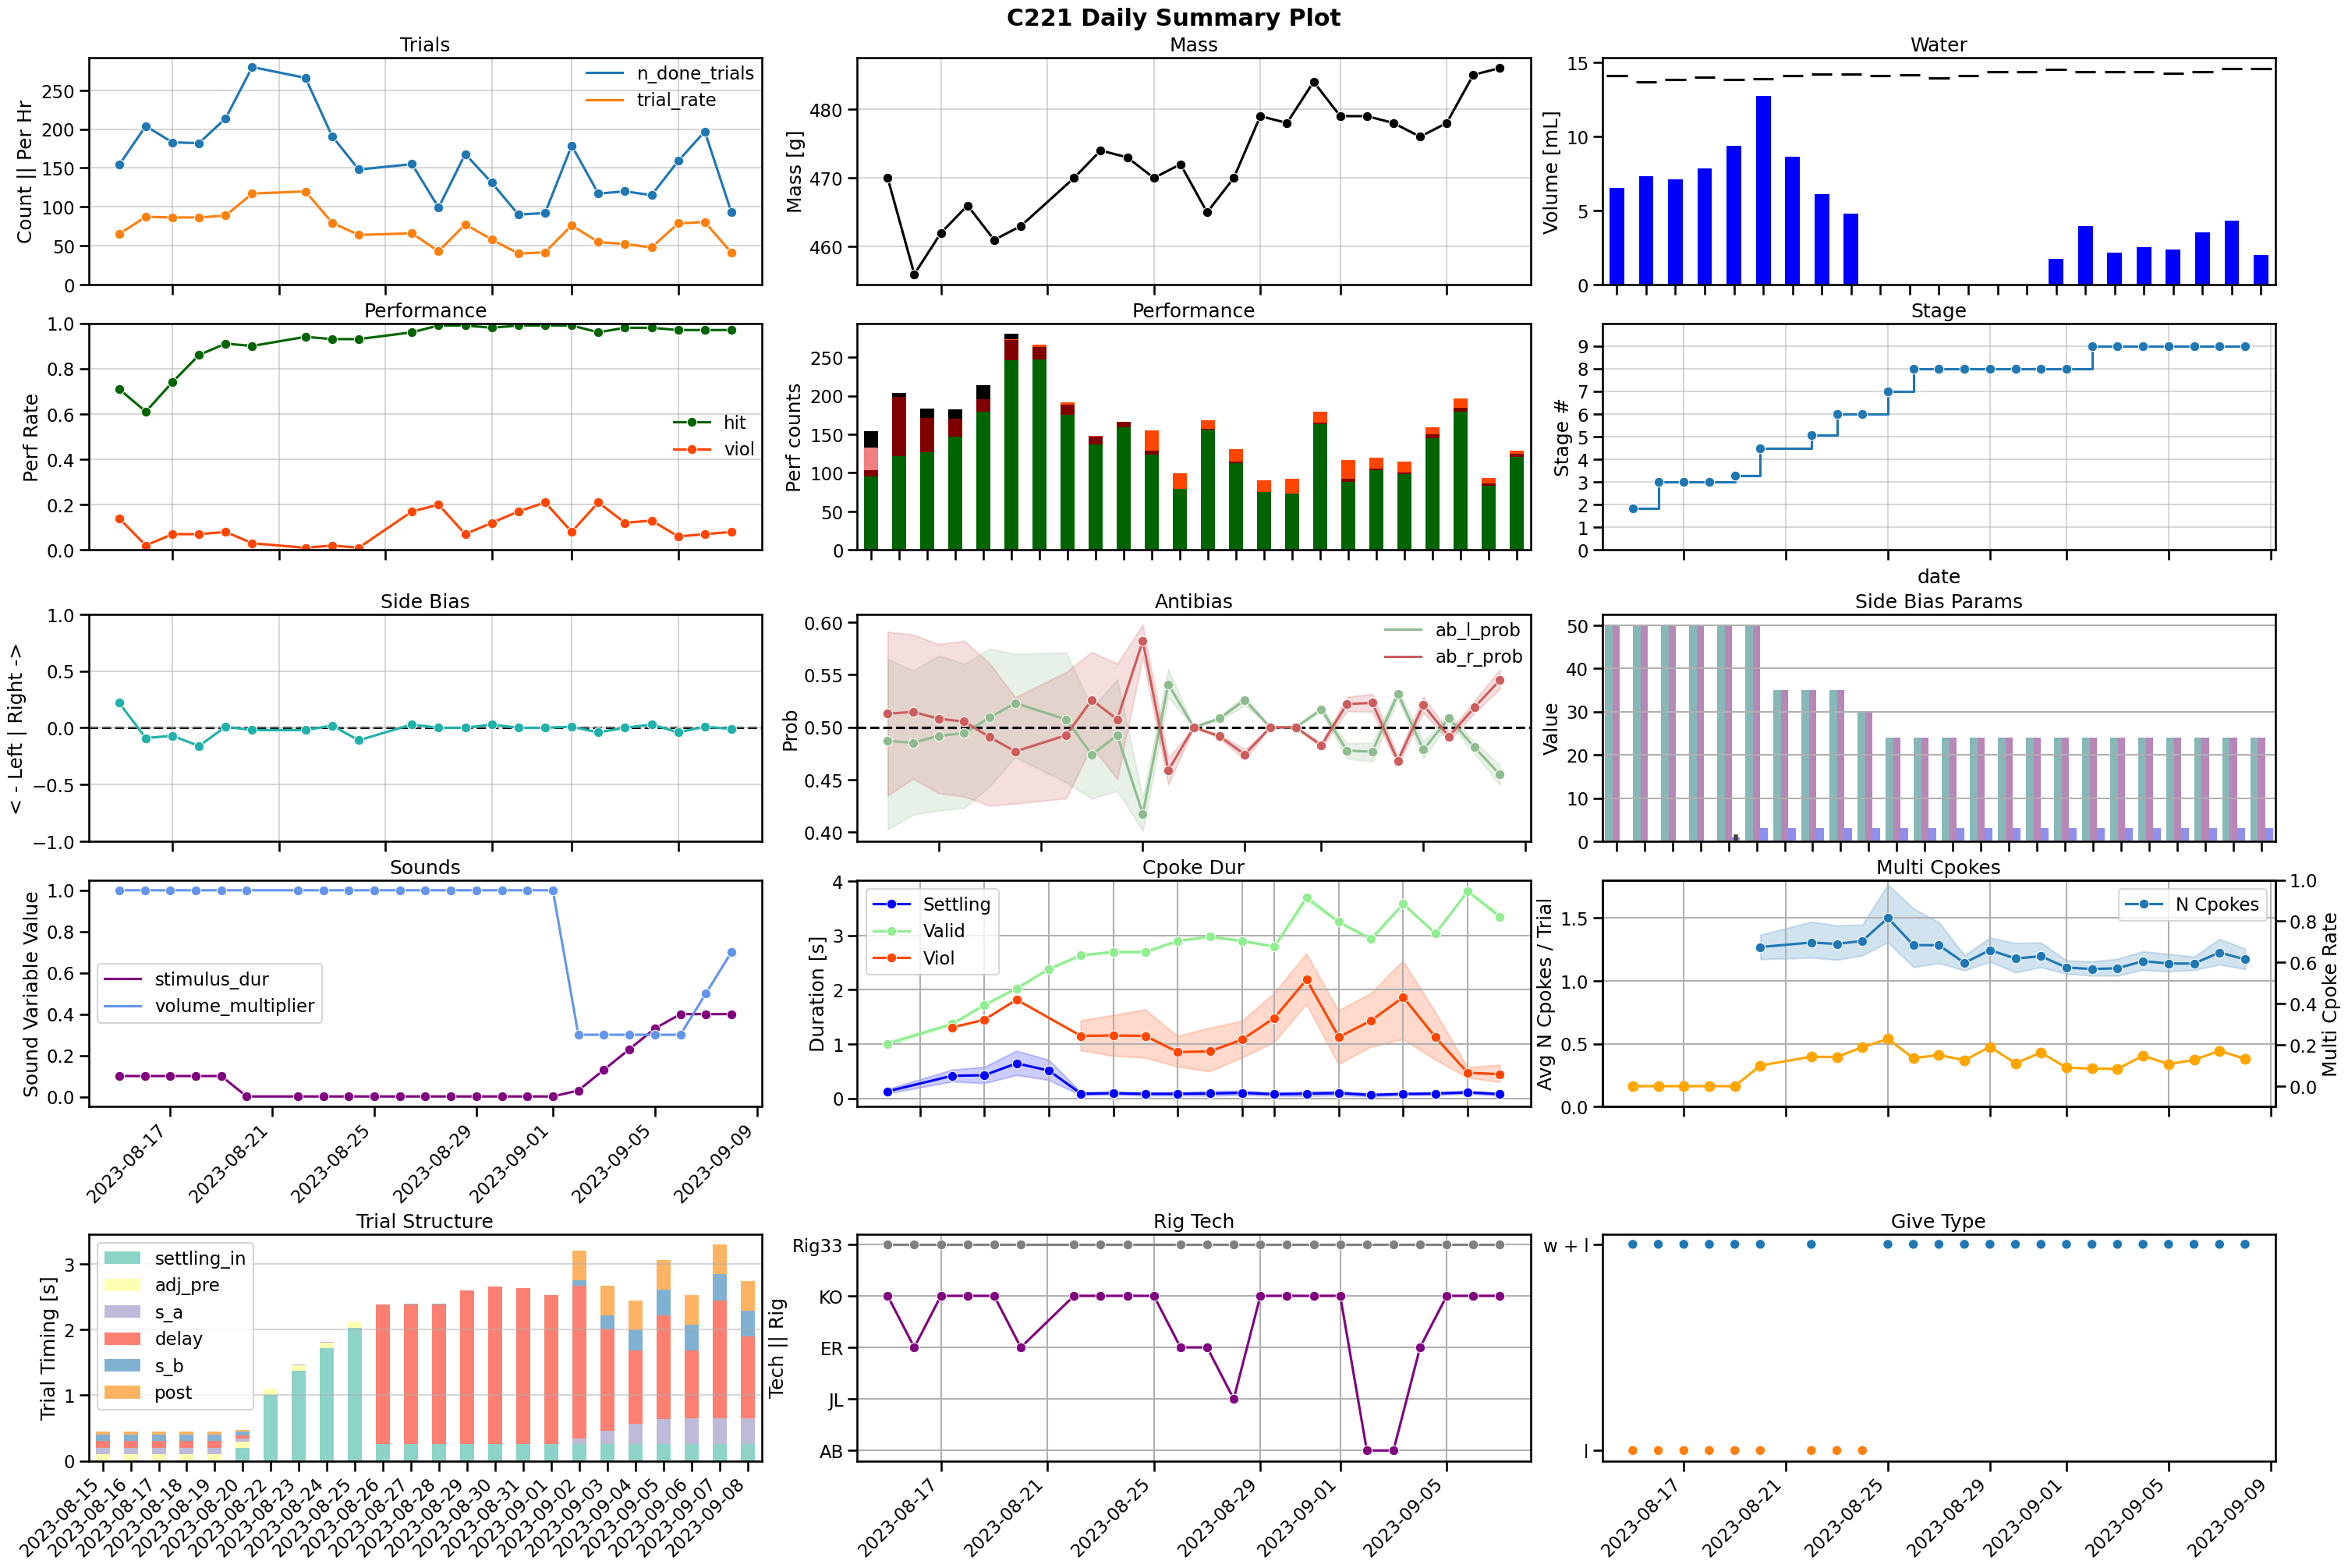

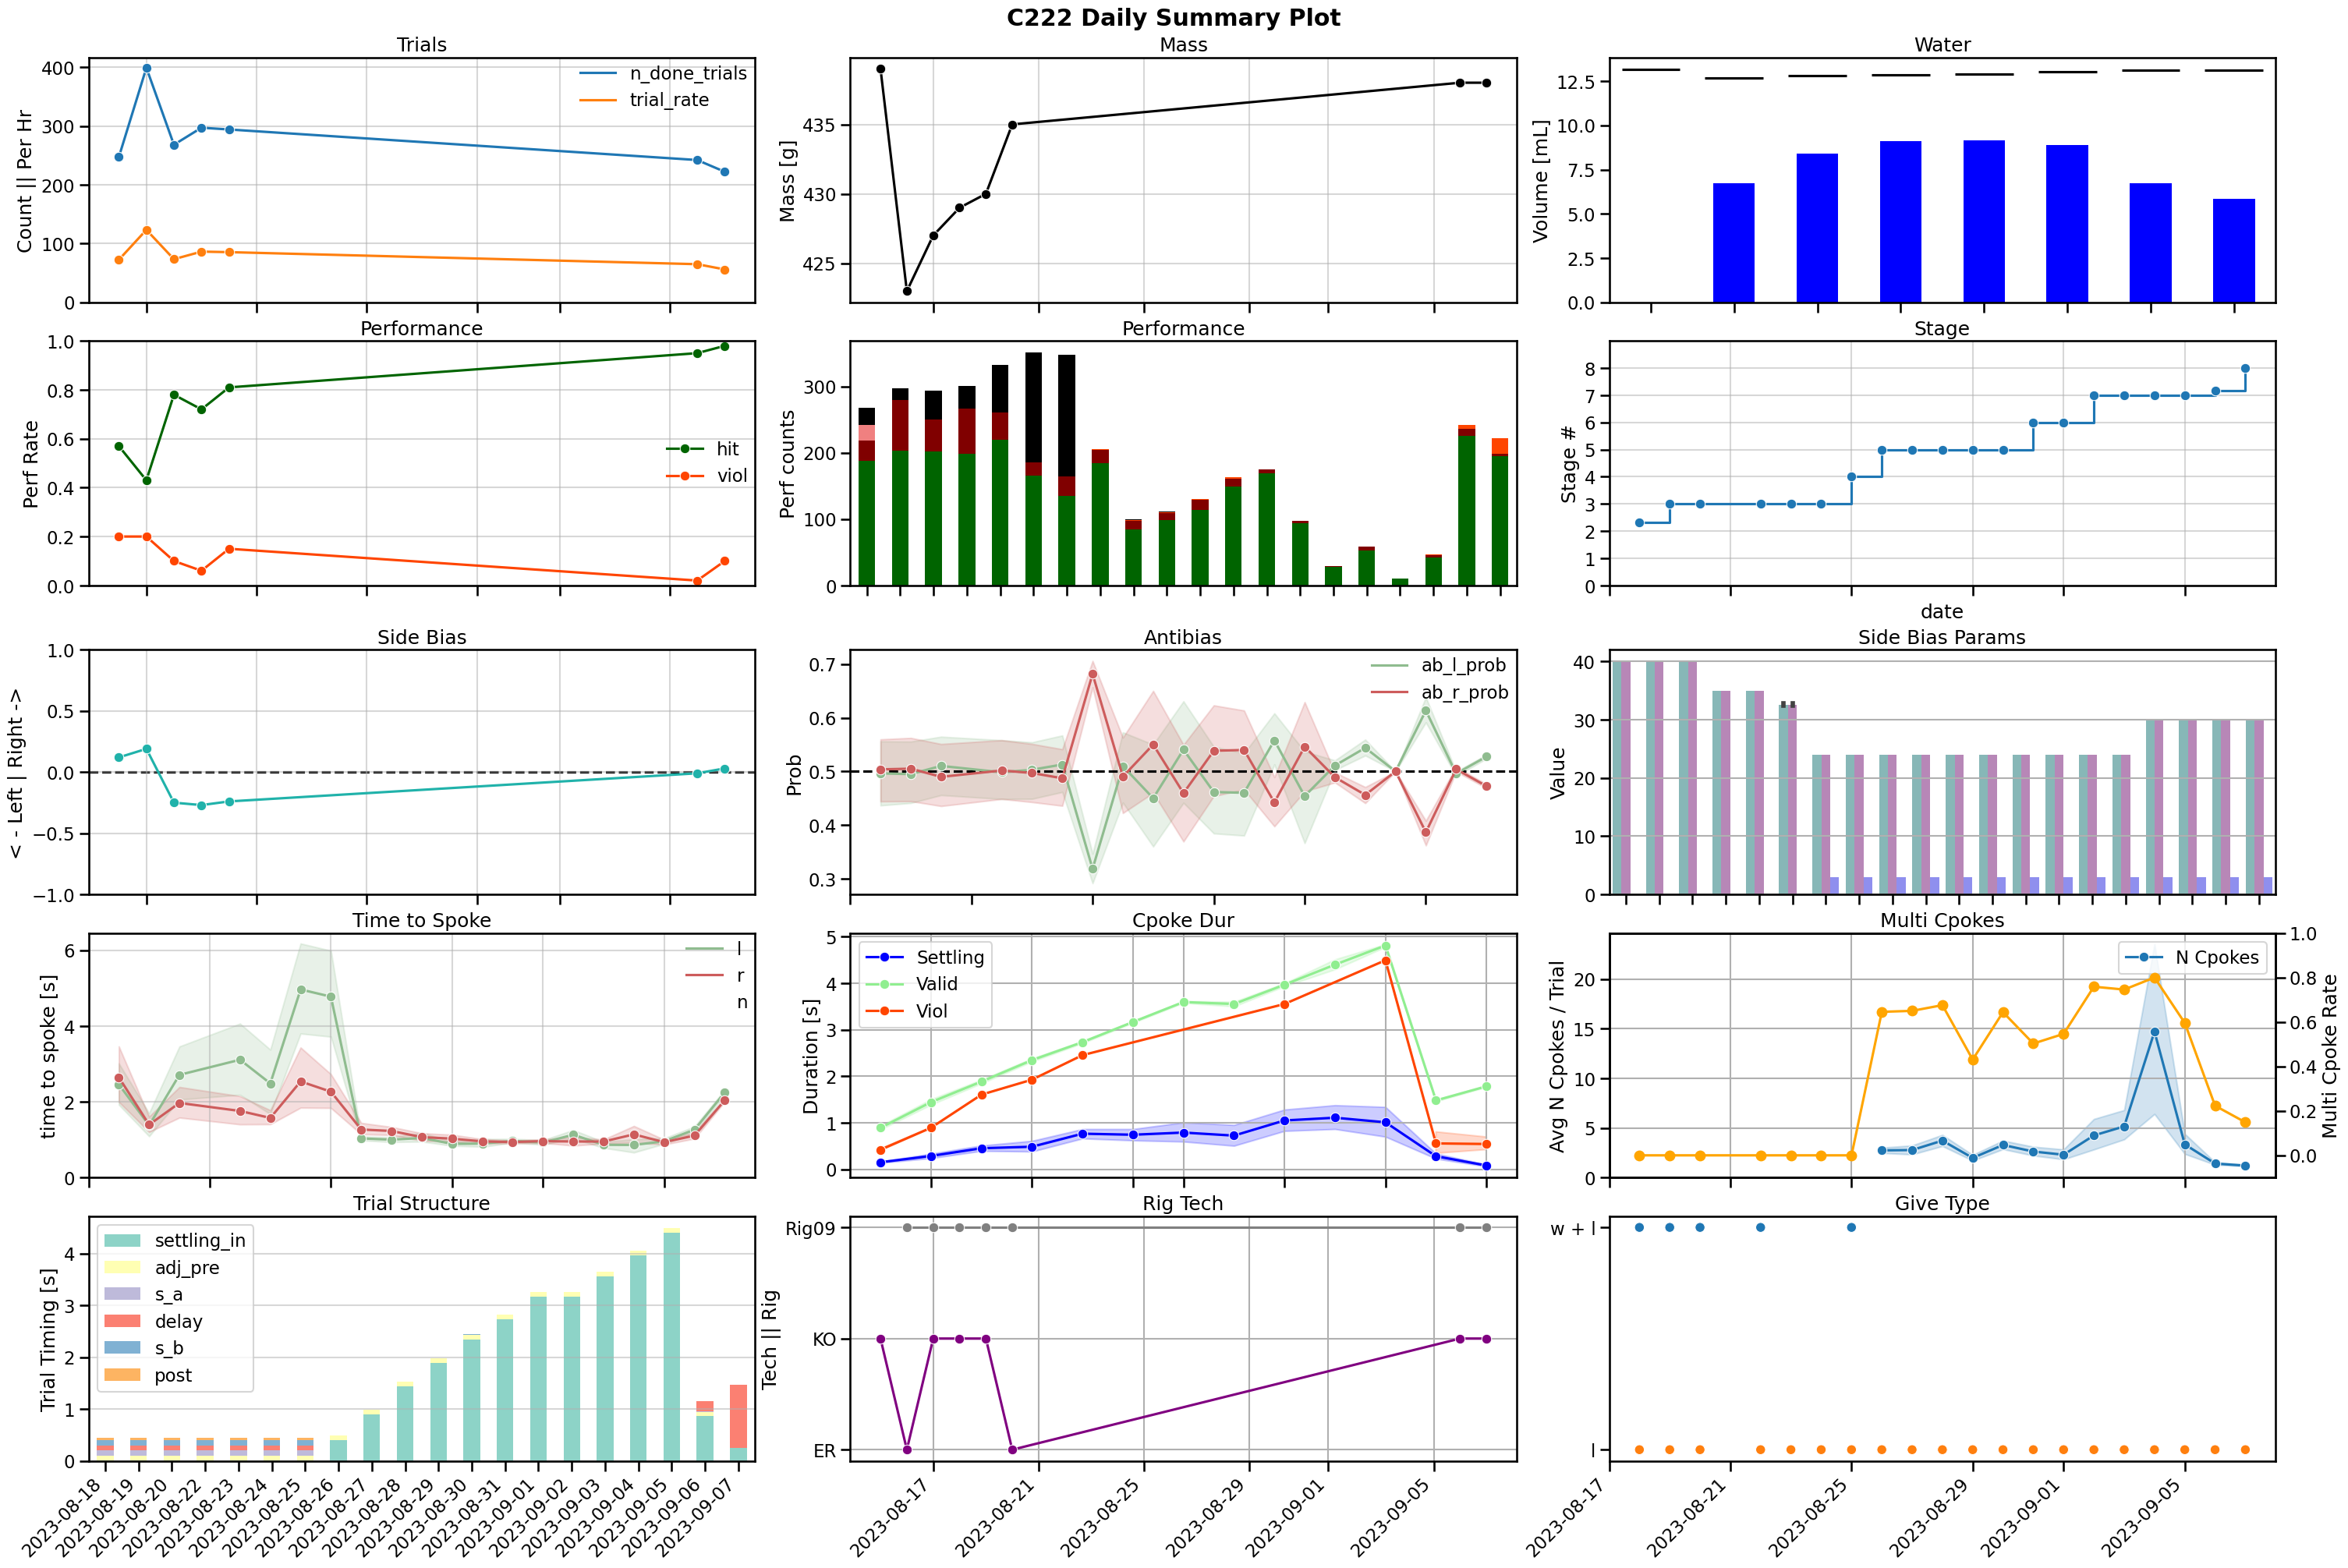

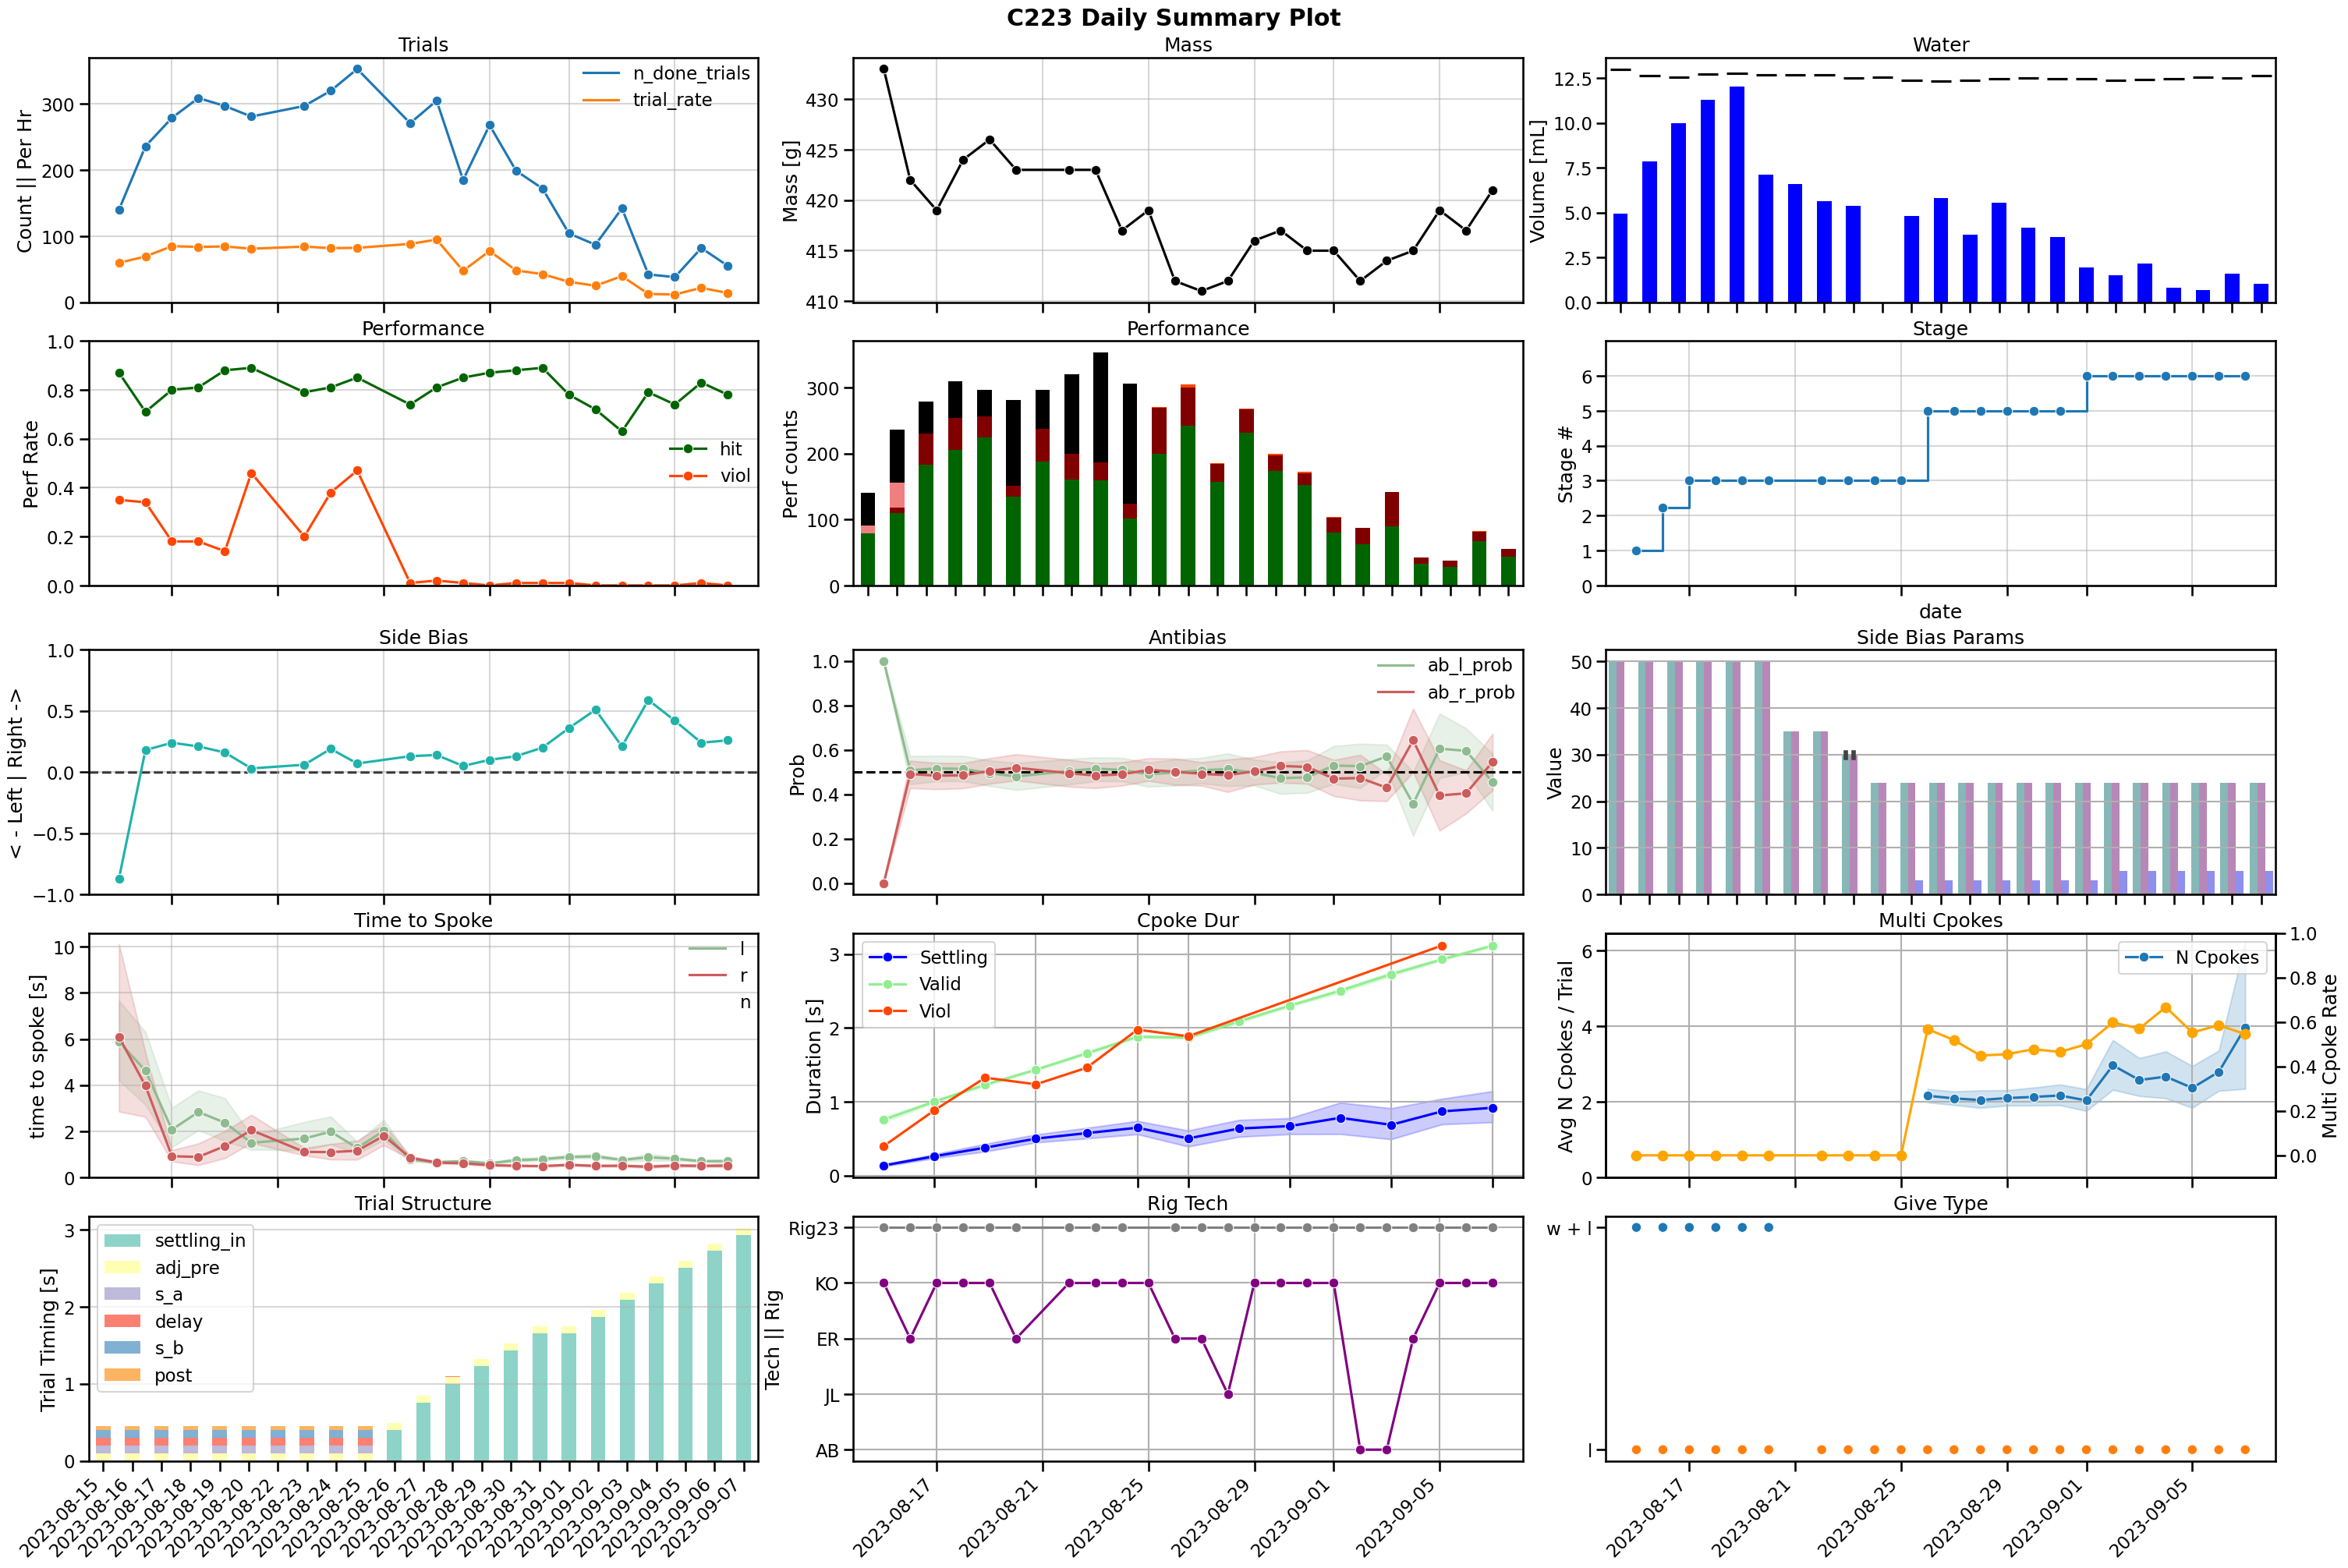

In [61]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)